# E1: Análisis Exploratorio de Datos en Python con Pandas y NumPy

En esta prueba práctica, los estudiantes aplicarán sus conocimientos en Python y herramientas de análisis de datos dentro del entorno Jupyter Notebook. A partir de un dataset ficticio de pacientes, deberán demostrar su capacidad para:
- Configurar el entorno de trabajo en Anaconda y Jupyter Notebook.
- Utilizar Pandas y NumPy para la manipulación y exploración de datos.
- Aplicar operaciones estadísticas básicas para extraer información relevante.
- Generar visualizaciones de datos con Matplotlib.

Este ejercicio tiene como objetivo evaluar la habilidad del estudiante para trabajar con datos en Python, desde su carga y preprocesamiento hasta su análisis y visualización. Se espera que los participantes estructuren su código de manera clara y utilicen buenas prácticas de programación.


#### Configuración del Entorno:

- Verifica que las librerías necesarias (numpy y pandas) estén instaladas en tu entorno. Si no lo están, instálalas usando pip o conda.
- Importa las librerías necesarias (numpy, pandas, matplotlib.pyplot) y muestra sus versiones en el notebook.

In [12]:
import numpy as np
print (np.__version__)


1.26.4


In [14]:
import pandas as pd
print (pd.__version__)

2.2.2


In [16]:

import matplotlib.pyplot as plt
print (plt.matplotlib.__version__)

3.9.2


#### Carga y Exploración de Datos:

- Descarga y carga el archivo datos_pacientes.csv en un DataFrame de Pandas.
- Muestra las primeras 5 filas del dataset.
- Obtén información sobre los tipos de datos y verifica la existencia de valores nulos en el dataset.


In [20]:
df = pd.read_csv('datos_pacientes.csv', index_col = ['ID'])

In [22]:
df.head()

,Edad,Género,Peso,Altura,Presión_Arterial
ID,,,,,
1,71,F,116.4,1.69,143
2,34,M,67.7,1.50,127
3,80,M,75.1,1.69,137
4,40,M,76.6,1.90,116
5,43,M,92.4,1.80,109


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Edad              1000 non-null   int64  
 1   Género            1000 non-null   object 
 2   Peso              1000 non-null   float64
 3   Altura            1000 non-null   float64
 4   Presión_Arterial  1000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 46.9+ KB


In [26]:
df.dtypes

Edad                  int64
Género               object
Peso                float64
Altura              float64
Presión_Arterial      int64
dtype: object

#### Análisis Estadístico con Pandas:

- Muestra un resumen estadístico de las variables numéricas.
- Calcula la edad promedio de los pacientes y el número de pacientes por género.
- Identifica cuántos pacientes tienen una presión arterial superior a 130 mmHg.

In [29]:
df.describe()

,Edad,Peso,Altura,Presión_Arterial
count,1000.000000,1000.00000,1000.000000,1000.00000
mean,54.195000,84.51870,1.757730,135.25200
std,20.521747,20.12022,0.141855,25.85767
min,20.000000,50.00000,1.500000,90.00000
25%,36.000000,66.50000,1.640000,112.00000
50%,54.000000,84.75000,1.760000,136.00000
75%,72.000000,102.05000,1.880000,157.00000
max,89.000000,119.80000,2.000000,179.00000


In [35]:
edad_promedio =df['Edad'].mean()
print(edad_promedio)


54.195


In [39]:
pacientes_genero = df['Género'].value_counts()
print(pacientes_genero)

Género
M    502
F    498
Name: count, dtype: int64


In [41]:
presion_alta = df[df["Presión_Arterial"] > 130]
pacientes_presion_alta = len(presion_alta)
print (pacientes_presion_alta)

555


#### Manipulación de Datos con NumPy y Pandas:

- Crea una nueva columna llamada IMC (Índice de Masa Corporal, BMI) utilizando la fórmula: 

<img src=https://www.eufic.org/en/media/images/2.2._bmi_img_1_.png width="250">

- Agrega una columna categórica Estado_IMC que clasifique a los pacientes en:
    - Bajo peso (IMC < 18.5)
    - Normal (IMC entre 18.5 y 24.9)
    - Sobrepeso (IMC entre 25 y 29.9)
    - Obesidad (IMC >= 30)
- Muestra la cantidad de pacientes en cada categoría de Estado_IMC.


In [65]:
import numpy as np

In [71]:
df ['IMC'] = df['Peso'] / (df['Altura']**2)

In [73]:
def define_imc(imc):
    if imc < 18.5:
        return 'Bajo peso'
    elif 18.5 <= imc <= 24.9:
        return 'Normal'
    elif 25 <= imc <=29.9:
        return 'Sobrepeso'
    else:
        return 'obesidad'

df['Estado_IMC'] = df['IMC'].apply(define_imc)
conteo_estado_imc = df['Estado_IMC'].value_counts()
print(conteo_estado_imc)

Estado_IMC
obesidad     395
Normal       249
Sobrepeso    219
Bajo peso    137
Name: count, dtype: int64


#### Visualización de Datos:

- Genera un gráfico de barras que muestre la cantidad de pacientes en cada categoría de Estado_IMC.
- Usa matplotlib para personalizar el gráfico con título, etiquetas y colores adecuados.


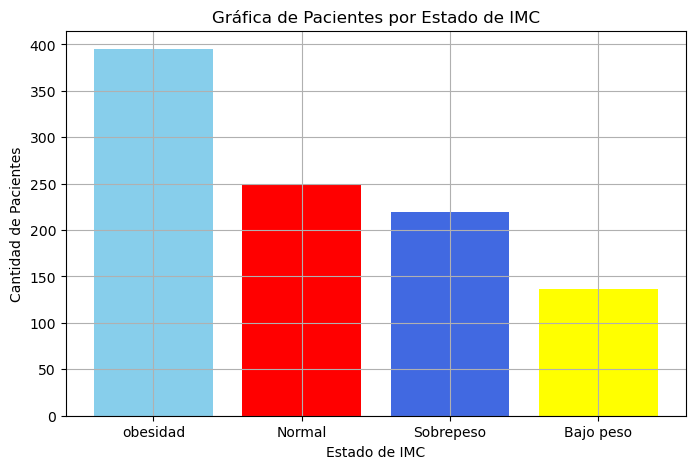

In [103]:
plt.figure(figsize=(8,5))
plt.bar(conteo_estado_imc.index, conteo_estado_imc.values, color=['skyblue', 'red', 'royalblue', 'yellow'])
plt.title('Gráfica de Pacientes por Estado de IMC')
plt.xlabel('Estado de IMC')
plt.ylabel('Cantidad de Pacientes')
plt.grid(True)   